In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('tips.csv')
x = np.array(data.iloc[:,0].values)[:,np.newaxis]
y = np.array(data.iloc[:,1].values)[:,np.newaxis]
domain = np.linspace(0,60,100)


In [3]:
def kernel(x,x0,t):
 return np.exp(np.sum((x-x0)**2 , axis = 1)/ (-2*t*t))

In [4]:
def local_regression(x,x0,y,t):
 x0 = np.r_[1,x0]
 x = np.c_[np.ones(len(x)),x]
 xw = x.T * kernel(x,x0,t)
 beta = np.linalg.pinv(xw @ x) @ xw @ y
 return x0 @ beta

In [5]:
def plot_graph(t):
 pred = [local_regression(x,x0,y,t) for x0 in domain]
 plt.plot(x,y, 'b.')
 plt.plot(domain,pred, 'r.')
 plt.show()


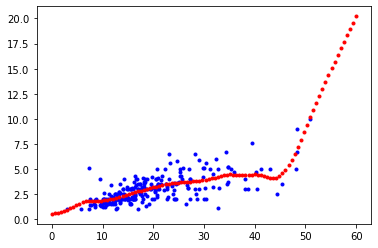

In [6]:
plot_graph(2)
